### Analyzing Target Markets for E-Learning Products

We are trying to analyze target markets where e-LEarning products can be effectively advertised to maximize return on investment.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.options.display.max_columns = 150 # to avoid truncated output 


# Read and display the raw data
new_coders = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory=False)
new_coders


Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo  \
0      27.0               0.0             NaN                NaN   
1      34.0               0.0             NaN                NaN   
2      21.0               0.0             NaN                NaN   
3      26.0               0.0             NaN                NaN   
4      20.0               0.0             NaN                NaN   
5      28.0               0.0             NaN                NaN   
6      29.0               0.0             NaN                NaN   
7      29.0               0.0             NaN                NaN   
8      23.0               0.0             NaN                NaN   
9      24.0               0.0             NaN                NaN   
10     20.0               0.0             NaN                NaN   
11     22.0               0.0             NaN                NaN   
12     18.0               0.0             NaN                NaN   
13     44.0               0.0             NaN                NaN   
14     27.0               1.0             1.0                0.0   
15     32.0               0.0             NaN                NaN   
16     29.0               0.0             NaN                NaN   
17     18.0               0.0             NaN                NaN   
18     46.0               0.0             NaN                NaN   
19     31.0               0.0             NaN                NaN   
20     32.0               0.0             NaN                NaN   
21     23.0               0.0             NaN                NaN   
22     27.0               0.0             NaN                NaN   
23     27.0               0.0             NaN                NaN   
24     26.0               1.0             1.0                0.0   
25     29.0               0.0             NaN                NaN   
26     30.0               1.0             1.0                0.0   
27     19.0               0.0             NaN                NaN   
28     19.0               0.0             NaN                NaN   
29     27.0               0.0             NaN                NaN   
...     ...               ...             ...                ...   
18145  50.0               0.0             NaN                NaN   
18146  36.0               0.0             NaN                NaN   
18147  28.0               0.0             NaN                NaN   
18148  31.0               0.0             NaN                NaN   
18149  33.0               0.0             NaN                NaN   
18150  33.0               0.0             NaN                NaN   
18151  38.0               0.0             NaN                NaN   
18152  33.0               0.0             NaN                NaN   
18153  27.0               0.0             NaN                NaN   
18154  26.0               0.0             NaN                NaN   
18155  30.0               0.0             NaN                NaN   
18156  29.0               0.0             NaN                NaN   
18157  32.0               0.0             NaN                NaN   
18158  24.0               0.0             NaN                NaN   
18159  34.0               0.0             NaN                NaN   
18160  62.0               0.0             NaN                NaN   
18161  32.0               0.0             NaN                NaN   
18162  26.0               0.0             NaN                NaN   
18163  57.0               0.0             NaN                NaN   
18164  29.0               1.0             1.0                0.0   
18165  48.0               0.0             NaN                NaN   
18166  41.0               0.0             NaN                NaN   
18167  31.0               0.0             NaN                NaN   
18168  30.0               0.0             NaN                NaN   
18169  26.0               0.0             NaN                NaN   
18170  41.0               0.0             NaN                NaN   
18171  31.0               0.0             NaN                NaN

Running full-blown surveys to gather data can be a very expensive proposition. Hence, we are looking for options to obtain data from surveys that others have organized.

**freeCodeCamp** organizes an annual Developer Survey  to understand developer trends, which provides us with very relevant data for our analysis and hence can be a very good stand-in for running our own Survey.

The data we are using has been retrieved from the GitHub repository: https://github.com/freeCodeCamp/2017-new-coder-survey

In [2]:
# Looking at Job Role Interest
#pd.DataFrame(new_coders['JobRoleInterest'].value_counts(normalize=True, dropna=False).apply(lambda x: '{0:.2f}'.format((x * 100))))
#pd.DataFrame(new_coders['JobRoleInterest'].value_counts(normalize=True, dropna=False).apply(lambda x: round(x * 100, 2)))
new_coders['JobRoleInterest'].value_counts(normalize=True, dropna=False)


NaN                                                                                                                                                                                                                                     0.615296
Full-Stack Web Developer                                                                                                                                                                                                                0.045282
  Front-End Web Developer                                                                                                                                                                                                               0.024759
  Data Scientist                                                                                                                                                                                                                        0.008363
Back-End Web Developer              

#### Analyzing Interest - Single or Multiple

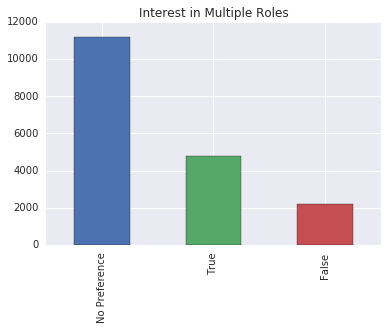

In [3]:
new_coders['JobRoleInterest'].copy().str.contains(',', regex=False).value_counts(dropna=False).rename(lambda x: 'No Preference' if np.isnan(x) else str(x)).plot.bar(title='Interest in Multiple Roles')

Over 61% of the respondents have not provided any preference with regards to their **Job Role Interst**.

#### Is this sample representative?

Our primary interest is in the people who would like to play roles pertaining to Web Development or Mobile Development. However, given that over 63% of the respondents in this sample have not provided any indication of the Job Role they would prefer, it would be difficult to consider the entire sample as representative of the population we are interested in.

However, there is a subset of this data that can be further analyzed: those specific users in this sample who have provided a response. For this analysis we will focus on those respondents that have provided a response to this question.

True     68.349542
False    31.650458
Name: JobRoleInterest, dtype: float64


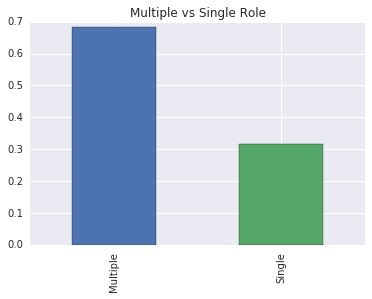

In [4]:
# Let us redraw this after dropping those records where no Job Role interest
# has been provided
job_role_interest = new_coders['JobRoleInterest'].dropna()

# Print a frequency table of Job Role interest -- Single Role vs Multiple Roles
print(job_role_interest.str.contains(',', regex=False).value_counts(normalize=True)*100)

# Draw the charts to compare preference for Single Role vs Multiple Roles
job_role_interest.str.contains(',', regex=False).value_counts(normalize=True).rename({True: 'Multiple', False:'Single'}).plot.bar(title='Multiple vs Single Role')

Almost 70% of those respondents who have expressed an interest in a Job Role still don't have a clear idea as to which specific role they would be interested in. Most respondents have selected multiple roles that they would be willing to play.

Since we are interested in the market for Web Development or Mobile Development related courses, we can further analyze this data to find out the amount of interest in these areas.

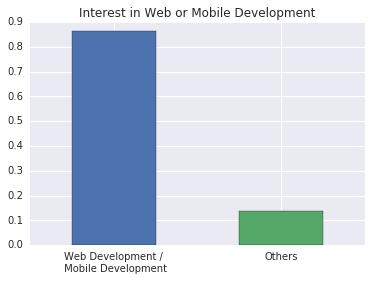

In [5]:
job_role_interest.str.contains('Web Dev|Mobile Dev').value_counts(normalize=True).rename({True: 'Web Development /\n Mobile Development', False:'Others'}).plot.bar(title='Interest in Web or Mobile Development', rot=0)

In [6]:
job_role_interest.str.contains('Web Dev|Mobile Dev').value_counts(normalize=True)*100

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64

We can see that over 86% of the respondents who have provided a Job Role preference have expressed a preference for either _Web Development_ or _Mobile Development_ roles.

Given this, we can say that this smaller sample of people who have provided a Job Role preference may be considered representative of the population we are interested in.

Further to ensure that from here on we are working on just the representative sample, we drop any of the records belonging to respondents who have not provided a Job role preference.

In [7]:
rep_sample = new_coders[new_coders['JobRoleInterest'].notnull()].copy()

rep_sample.shape

(6992, 136)

#### Target Markets

We will now try to analyze the representative sample to find out potential target markets to advertise in.

The data provides us details of where these respondents are originally from, as well as where they currently live. Since we are interested in advertising to them, we will look at the locations where they currently live.

Since the most granular level at which this data is available is at the Country level, we can consider each Country as a market in itself. Hence, our problem now becomes identfying the top 2 countries where we should be running advertisements for our courses.

In [8]:
# Generate a absolute frequency table for Countries where developers live 
country_live = pd.DataFrame(rep_sample['CountryLive'].value_counts())

# Relative Frequency Table for Countries where developers live
country_per = rep_sample['CountryLive'].value_counts(normalize=True)

# Add all relevant data into a single DF
country_live['Country'] = country_live.index
country_live['Percentage'] = country_per * 100

# Print the number of countries
print('Number of Countries where Developers Live: ', country_live.shape[0])

# Top 4 countries where developers live
country_live.iloc[:4]

Number of Countries where Developers Live:  137


CountryLive                   Country  Percentage
United States of America         3125  United States of America   45.700497
India                             528                     India    7.721556
United Kingdom                    315            United Kingdom    4.606610
Canada                            260                    Canada    3.802281

There are 137 countries where our potential customers currently live. However, we are interested in identifying the top two countries.

The top countries with the maximum number of respondents are the **USA**, **India**, **United Kingdom**, and **Canada**.

#### Where is the money?

While we have clearly identified that the markets with the most number of developers are the **USA** and **India**, we also need to look at whether or not these markets are the ones that generate the maximum revenue for Training programs.

To do this, we will look at the amount of money that the developers in these markets are willing to spend on training.

We first identify how much money each of these respondents have spent per month on training. Because some respondents have just started their training, the number of months they have been programming for comes up as 0. We assume that all these folks have programmed for at least a month to avoid issues with zero-division.

In [9]:
# Replace all rows where the MonthsProgramming is 0 with 1 to avoid zero-division
rep_sample.loc[rep_sample['MonthsProgramming'] == 0, 'MonthsProgramming'] = 1

# Calculate average spend per month
rep_sample['MoneyPerMonth'] = rep_sample['MoneyForLearning'] / rep_sample['MonthsProgramming']

# Records with no data for average spend
print('Data for average spend absent: ', rep_sample[rep_sample['MoneyPerMonth'].isnull()].shape[0])

# Records with data for average spend
print('Data for average spend present: ', rep_sample[rep_sample['MoneyPerMonth'].notnull()].shape[0])

Data for average spend absent:  675
Data for average spend present:  6317


We have found that of the total 6992 developers, 6317 are willing to pay some money towards training and learning.

We will focus our analysis on these 6317 developers to figure out where they live and try to arrive at the _**Average Dollar amount spent**_ in each of the countries where these developers are located.

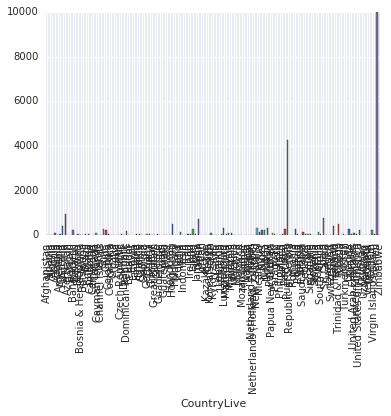

In [10]:
# Get rid of records where Average Spend or Country data is missing
rep_sample = rep_sample[rep_sample['MoneyPerMonth'].notnull() & rep_sample['CountryLive'].notnull()]

# Group by Country and derive the mean for each column
rep_country_group = rep_sample.groupby(by='CountryLive').mean()

# Plot a graph to visualize the country-level data
rep_country_group['MoneyPerMonth'].plot.bar()

If we create a rough plot of the average amount being spent across all the countries where our developers of interest live, the result appears to be a jumbled mess with very little detail available to us.

However, what immediately does become apparent from the plot below is there there appear to be some outliers --- bars that stand way beyond everything else.

To tease out which of these are our outliers and to analyze these **_peaks_** in more detail, we can focus on those countries that have the 10 highest average dollar amount spent per month.

In [11]:
rep_country_group.nlargest(10, 'MoneyPerMonth')

Age  AttendedBootcamp  BootcampFinish  \
CountryLive                                                      
Yemen               1.000000          0.000000             NaN   
Puerto Rico        30.428571          0.000000             NaN   
Austria            26.500000          0.062500        0.000000   
Spain              28.200000          0.106061        0.428571   
Jamaica            29.000000          0.000000             NaN   
Hong Kong          24.777778          0.111111        0.000000   
Trinidad & Tobago  37.000000          0.000000             NaN   
Australia          28.465347          0.068627        0.142857   
Taiwan             31.166667          0.166667        0.500000   
Luxembourg         26.333333          0.333333        0.000000   

                   BootcampLoanYesNo  BootcampRecommend  ChildrenNumber  \
CountryLive                                                               
Yemen                            NaN                NaN             NaN   
Puerto Rico                      NaN                NaN        4.000000   
Austria                     0.000000           1.000000        2.000000   
Spain                       0.714286           0.857143        1.200000   
Jamaica                          NaN                NaN        2.000000   
Hong Kong                   0.000000           1.000000        1.000000   
Trinidad & Tobago                NaN                NaN             NaN   
Australia                   0.428571           0.857143        1.714286   
Taiwan                      0.500000           0.500000        2.333333   
Luxembourg                  0.000000           1.000000             NaN   

                   CodeEventConferences  CodeEventDjangoGirls  CodeEventFCC  \
CountryLive                                                                   
Yemen                               NaN                   NaN           NaN   
Puerto Rico                         NaN                   NaN           NaN   
Austria                             1.0                   NaN           1.0   
Spain                               1.0                   1.0           1.0   
Jamaica                             1.0                   NaN           1.0   
Hong Kong                           1.0                   NaN           NaN   
Trinidad & Tobago                   NaN                   NaN           NaN   
Australia                           1.0                   NaN           1.0   
Taiwan                              NaN                   1.0           1.0   
Luxembourg                          NaN                   NaN           NaN   

                   CodeEventGameJam  CodeEventGirlDev  CodeEventHackathons  \
CountryLive                                                                  
Yemen                           1.0               NaN                  NaN   
Puerto Rico                     NaN               NaN                  1.0   
Austria                         NaN               NaN                  NaN   
Spain                           1.0               NaN                  1.0   
Jamaica                         NaN               NaN                  1.0   
Hong Kong                       NaN               NaN                  1.0   
Trinidad & Tobago               NaN               NaN                  NaN   
Australia                       NaN               NaN                  1.0   
Taiwan                          NaN               NaN                  1.0   
Luxembourg                      NaN               NaN                  1.0   

                   CodeEventMeetup  CodeEventNodeSchool  CodeEventNone  \
CountryLive                                                              
Yemen                          NaN                  NaN            NaN   
Puerto Rico                    NaN                  NaN            1.0   
Austria                        1.0                  1.0            NaN   
Spain                          1.0                  1.0            1.0   
J

Let us also look at how many respondents there are in each of these countries with the highest average dollar amount spent per month

In [12]:
rep_sample.loc[rep_sample['CountryLive'].str.contains('|'.join(rep_country_group.nlargest(10, 'MoneyPerMonth').index.tolist())), 'CountryLive'].value_counts()

Australia            102
Spain                 66
Austria               16
Taiwan                12
Jamaica                9
Hong Kong              9
Puerto Rico            7
Luxembourg             6
Trinidad & Tobago      1
Yemen                  1
Name: CountryLive, dtype: int64

It is immediately clear, that these peaks in the monthly spend are perhaps the result of a few high-spending users living in these countries. However, this does not justify us considering these countries as Target markets for our longer term marketing strategy as there is relatively low user count.

To continue our analysis we will focus on the top four countries with most number of developers: **United States**, **India**, **United Kingdom**, and **Canada**.

Count of users across top-4 countries
United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Name: CountryLive, dtype: int64


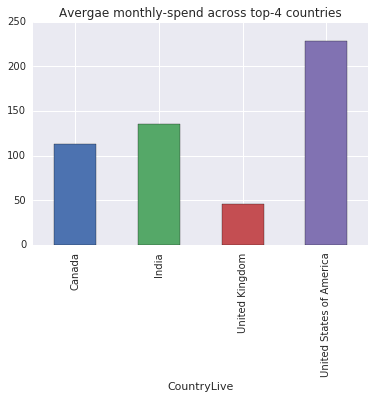

In [13]:
#rep_country_group.loc[['Canada', 'India', 'United Kingdom', 'United States of America']]
print('Count of users across top-4 countries')
print(rep_sample.loc[rep_sample['CountryLive'].str.contains('Canada|India|United Kingdom|United States of America'), 'CountryLive'].value_counts())

rep_country_group.loc[['Canada', 'India', 'United Kingdom', 'United States of America'], 'MoneyPerMonth'].plot.bar(title="Avergae monthly-spend across top-4 countries")

Given that the **United Kingdom** and **Canada** are considerably richer than **India** in terms of per-capita income, we would have expected that monthly spending from these countries to also be higher than that of **India**. However, we notice in this data that this is not the case.

It might be worthwhile doing some more analysis to validate the underlying data for these countries to ensure that there aren't any specific outliers that are skewing the mean for these countries.

In [14]:
top_four = rep_sample[rep_sample['CountryLive'].str.contains('Canada|India|United Kingdom|United States of America')]

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



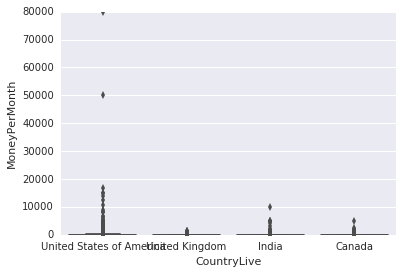

In [15]:
sns.boxplot(x='CountryLive', y='MoneyPerMonth', data=top_four)
#sns.boxplot(x='CountryLive', y='MoneyPerMonth', data=rep_analyze[rep_analyze['CountryLive'].str.contains('Canada|India|United Kingdom|United States of America')])

#### Eliminating Outliers

##### United States
There are a couple of users in the United States who are spending more than $20,000 per month. While it is certainly possible that there are some uber-rich folks in the US, it is highly unlikely that they would be spending this kind of money on learning every month.

We shall eliminate these outliers.

In addition, there are a few very big spenders in the US dataset, which will warrant a close look.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



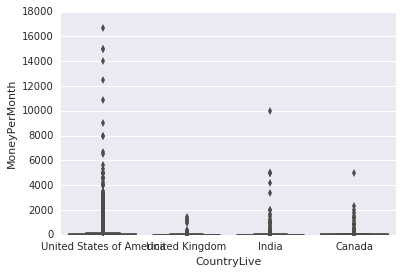

In [16]:
# Eliminating extreme outliers
top_four = top_four[top_four['MoneyPerMonth'] < 20000]

sns.boxplot(x='CountryLive', y='MoneyPerMonth', data=top_four)

In [17]:
us = top_four[top_four['CountryLive'] == 'United States of America']

# Examining the US dataset for very high spenders
us[us['MoneyPerMonth'] >= 6000]


Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo  \
718    26.0               1.0             0.0                0.0   
1222   32.0               1.0             0.0                0.0   
3184   34.0               1.0             1.0                0.0   
3930   31.0               0.0             NaN                NaN   
6805   46.0               1.0             1.0                1.0   
7198   32.0               0.0             NaN                NaN   
7505   26.0               1.0             0.0                1.0   
9778   33.0               1.0             0.0                1.0   
16650  29.0               0.0             NaN                NaN   
16997  27.0               0.0             NaN                NaN   
17231  50.0               0.0             NaN                NaN   

                                 BootcampName  BootcampRecommend  \
718    The Coding Boot Camp at UCLA Extension                1.0   
1222                            The Iron Yard                1.0   
3184                           We Can Code IT                1.0   
3930                                      NaN                NaN   
6805                                 Sabio.la                0.0   
7198                                      NaN                NaN   
7505                                   Codeup                0.0   
9778                             Grand Circus                1.0   
16650                                     NaN                NaN   
16997                                     NaN                NaN   
17231                                     NaN                NaN   

       ChildrenNumber                 CityPopulation  CodeEventConferences  \
718               NaN            more than 1 million                   1.0   
1222              NaN  between 100,000 and 1 million                   NaN   
3184              NaN            more than 1 million                   NaN   
3930              NaN  between 100,000 and 1 million                   NaN   
6805              NaN  between 100,000 and 1 million                   NaN   
7198              NaN            more than 1 million                   1.0   
7505              NaN            more than 1 million                   NaN   
9778              NaN  between 100,000 and 1 million                   NaN   
16650             2.0            more than 1 million                   NaN   
16997             1.0            more than 1 million                   NaN   
17231             2.0              less than 100,000                   NaN   

       CodeEventDjangoGirls  CodeEventFCC  CodeEventGameJam  CodeEventGirlDev  \
718                     NaN           NaN               NaN               NaN   
1222                    NaN           NaN               NaN               NaN   
3184                    NaN           NaN               NaN               NaN   
3930                    NaN           NaN               NaN               NaN   
6805                    NaN           NaN               NaN               NaN   
7198                    NaN           NaN               NaN               NaN   
7505                    NaN           NaN               NaN               NaN   
9778                    NaN           NaN               NaN               NaN   
16650                   NaN           NaN               NaN               NaN   
16997                   NaN           NaN               NaN               NaN   
17231                   NaN           NaN               NaN               NaN   

       CodeEventHackathons  CodeEventMeetup  CodeEventNodeSchool  \
718                    NaN              NaN                  NaN   
1222                   NaN              1.0                  NaN   
3184                   NaN              1.0                  NaN   
3930                   NaN              NaN                  NaN   
6805                   NaN              NaN                  NaN   
7198                   NaN              1.0             

There are 11 users who have consistently spent more than \$6,000 per month in the US. While 6 of these have attended bootcamps, there are 5 users who have not attended any expensive bootcamps and still have a stated monthly spend of  have not attended any expensive bootcamps but are still spending more than \$10,000 per month. These are most likely errors, and we will drop these.

In addition, there are some users who have very low programming experience and hence may have only spent high for their initial months of programming. This does not indicate that they will continue to spend at these levels in the future.

In [18]:
# Isolate those high spenders who have not attended expensive Bootcamps
top_four = top_four.drop(
    us[
        (
            (us['MoneyPerMonth'] >= 6000) & 
            (us['AttendedBootcamp'] == 0)
        ) |
        (
            (us['MoneyPerMonth'] >= 6000) & 
            (us['MonthsProgramming'] <= 3)
        )
    ].index
)


##### India
We can also see a few very extreme spenders in India. For a country with with a much lower per capita income, these are very high monthly expenses and need to be looked at in more detail. We will examine all candidates who have spent more than \$2,500 per month for learning

In [19]:
india = top_four[top_four['CountryLive'] == 'India']

india[india['MoneyPerMonth'] >= 2500]

Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo BootcampName  \
1728   24.0               0.0             NaN                NaN          NaN   
1755   20.0               0.0             NaN                NaN          NaN   
7989   28.0               0.0             NaN                NaN          NaN   
8126   22.0               0.0             NaN                NaN          NaN   
13398  19.0               0.0             NaN                NaN          NaN   
15587  27.0               0.0             NaN                NaN          NaN   

       BootcampRecommend  ChildrenNumber                 CityPopulation  \
1728                 NaN             NaN  between 100,000 and 1 million   
1755                 NaN             NaN            more than 1 million   
7989                 NaN             NaN  between 100,000 and 1 million   
8126                 NaN             NaN            more than 1 million   
13398                NaN             NaN            more than 1 million   
15587                NaN             NaN            more than 1 million   

       CodeEventConferences  CodeEventDjangoGirls  CodeEventFCC  \
1728                    NaN                   NaN           NaN   
1755                    NaN                   NaN           1.0   
7989                    1.0                   NaN           NaN   
8126                    NaN                   NaN           NaN   
13398                   NaN                   NaN           NaN   
15587                   NaN                   NaN           NaN   

       CodeEventGameJam  CodeEventGirlDev  CodeEventHackathons  \
1728                1.0               NaN                  NaN   
1755                NaN               NaN                  1.0   
7989                NaN               NaN                  NaN   
8126                1.0               NaN                  1.0   
13398               NaN               NaN                  NaN   
15587               NaN               NaN                  1.0   

       CodeEventMeetup  CodeEventNodeSchool  CodeEventNone CodeEventOther  \
1728               NaN                  NaN            NaN            NaN   
1755               1.0                  NaN            NaN            NaN   
7989               NaN                  NaN            NaN            NaN   
8126               NaN                  NaN            NaN            NaN   
13398              NaN                  NaN            1.0            NaN   
15587              NaN                  NaN            NaN            NaN   

       CodeEventRailsBridge  CodeEventRailsGirls  CodeEventStartUpWknd  \
1728                    NaN                  NaN                   NaN   
1755                    NaN                  NaN                   NaN   
7989                    NaN                  NaN                   NaN   
8126                    NaN                  NaN                   NaN   
13398                   NaN                  NaN                   NaN   
15587                   NaN                  NaN                   NaN   

       CodeEventWkdBootcamps  CodeEventWomenCode  CodeEventWorkshops  \
1728                     NaN                 NaN                 NaN   
1755                     NaN                 NaN                 NaN   
7989                     NaN                 NaN                 1.0   
8126                     NaN                 NaN                 NaN   
13398                    NaN                 NaN                 NaN   
15587                    NaN                 NaN                 NaN   

            CommuteTime CountryCitizen CountryLive  \
1728                NaN          India       India   
1755                NaN          India       India   
7989   15 to 29 minutes          India       India   
8126                NaN          India       India   
13398               NaN          India       India   
15587  15 to 29 minutes          India       India   

                   EmploymentField Emp

From the responses provided by these extreme spenders it is not clear as to what they are spending these high amounts towards. Apart from a few conferences that a couple of them have attended, there is little reason to consider these high expenses to be something of a recurring nature.

We shall eliminate these high spenders from our analysis.

In [20]:
top_four = top_four.drop(india[india['MoneyPerMonth'] >= 2500].index)

##### Canada
We also have a users in Canada who spends above $5000 per month. We need to look at that data to see if there is a visible reason for that expense.

In [21]:
canada = top_four[top_four['CountryLive'] == 'Canada']

canada[canada['MoneyPerMonth'] >= 5000]

Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo BootcampName  \
13659  24.0               1.0             0.0                0.0      Bloc.io   

       BootcampRecommend  ChildrenNumber       CityPopulation  \
13659                1.0             NaN  more than 1 million   

       CodeEventConferences  CodeEventDjangoGirls  CodeEventFCC  \
13659                   1.0                   NaN           1.0   

       CodeEventGameJam  CodeEventGirlDev  CodeEventHackathons  \
13659               NaN               NaN                  NaN   

       CodeEventMeetup  CodeEventNodeSchool  CodeEventNone CodeEventOther  \
13659              1.0                  NaN            NaN            NaN   

       CodeEventRailsBridge  CodeEventRailsGirls  CodeEventStartUpWknd  \
13659                   NaN                  NaN                   NaN   

       CodeEventWkdBootcamps  CodeEventWomenCode  CodeEventWorkshops  \
13659                    NaN                 NaN                 1.0   

            CommuteTime CountryCitizen CountryLive EmploymentField  \
13659  30 to 44 minutes         Canada      Canada         finance   

      EmploymentFieldOther    EmploymentStatus EmploymentStatusOther  \
13659                  NaN  Employed for wages                   NaN   

       ExpectedEarning  FinanciallySupporting  FirstDevJob Gender GenderOther  \
13659          60000.0                    NaN          NaN   male         NaN   

       HasChildren  HasDebt  HasFinancialDependents  HasHighSpdInternet  \
13659          NaN      1.0                     0.0                 1.0   

       HasHomeMortgage  HasServedInMilitary  HasStudentDebt  HomeMortgageOwe  \
13659              1.0                  0.0             0.0         250000.0   

       HoursLearning                              ID.x  \
13659           10.0  739b584aef0541450c1f713b82025181   

                                   ID.y    Income  IsEthnicMinority  \
13659  28381a455ab25cc2a118d78af44d8749  140000.0               1.0   

       IsReceiveDisabilitiesBenefits  IsSoftwareDev  IsUnderEmployed  \
13659                            1.0            0.0              0.0   

            JobApplyWhen  JobInterestBackEnd  JobInterestDataEngr  \
13659  I haven't decided                 1.0                  NaN   

       JobInterestDataSci  JobInterestDevOps  JobInterestFrontEnd  \
13659                 1.0                NaN                  1.0   

       JobInterestFullStack  JobInterestGameDev  JobInterestInfoSec  \
13659                   1.0                 1.0                 NaN   

       JobInterestMobile JobInterestOther  JobInterestProjMngr  \
13659                1.0              NaN                  1.0   

       JobInterestQAEngr  JobInterestUX                               JobPref  \
13659                NaN            1.0  work for a multinational corporation   

       JobRelocateYesNo                                    JobRoleInterest  \
13659               NaN    Mobile Developer, Full-Stack Web Developer, ...   

      JobWherePref           LanguageAtHome          MaritalStatus  \
13659    from home  Yue (Cantonese) Chinese  single, never married   

       MoneyForLearning  MonthsProgramming   NetworkID         Part1EndTime  \
13659           10000.0                2.0  41c26f2932  2017-03-25 23:23:03   

            Part1StartTime         Part2EndTime       Part2StartTime  \
13659  2017-03-25 23:20:33  2017-03-25 23:24:34  2017-03-25 23:23:06   

       PodcastChangeLog  PodcastCodeNewbie  PodcastCodePen  PodcastDevTea  \
13659               NaN                NaN             NaN            NaN   

       PodcastDotNET  PodcastGiantRobots  PodcastJSAir  PodcastJSJabber  \
13659            NaN                 NaN           NaN              NaN   

       PodcastNone PodcastOther  PodcastProgThrowdown  PodcastRubyRogues  \
13659          1.0          NaN                   NaN                NaN   

       PodcastSEDaily  PodcastSERadio  PodcastShopTal

This sole big spender from Canada has attended a Bootcamp. It is possible that that was the sole big expense from their side. It is unlikely that this is an ongoing expense and hence we will drop this record.

In [22]:
top_four = top_four.drop(canada[canada['MoneyPerMonth'] >= 5000].index)

In [23]:
# Calculating the mean monthly spend for each country
top_four.groupby(by='CountryLive').mean()['MoneyPerMonth']

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: MoneyPerMonth, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



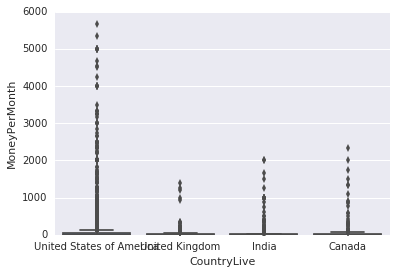

In [24]:
sns.boxplot(x='CountryLive', y='MoneyPerMonth', data=top_four)

#### Which markets to choose
The decision to choose the markets would mostly be based on which markets have the most potential to yield potential customers.

Given that our subscription is at \$59 per month, it is obvious that the **United Kingdom** would not fit hte bill as the average monthly spend in this market is only about \$45.

The **United States** is an obvious choice. We must advertise in this region.

As for the second market to choose, that would most probably be **Canada**, as it is home to those users with the second highest monthly spend on learning.

However, when we consider that the user-base in **India** is 192% that of **Canada** but with a 30% less average monthly spend, the choice becomes a bit harder. I believe that the larger user-base could potentially more thank make up for the potential loss of revenue due to lesser monthly spend.

Given that, the best recommendation would probably be to go with the following two markets:
1. **United States of America**
2. **India**

#### Allocation of Marketing Budget
If, however, we had a choice of splitting our marketing budget across multiple markets and choosing more than 2 markets, then it would make sensue to try and apportion the marketing spend across these markets based on their average monthly spend and size of the user-base.

1. 89% to the United States, 6% to India, 5% to Canada, based on the product of their user-base size and average monthly spend
2. 65% to the United States, 20% to India, 15% to Canada, to try and grow the untapped markets

Given the different available choices, it could also be said that the actual choice is best left to the experts in the Marketing team.